# Building Consumption

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
building_df = pd.read_csv('./building_consumption.csv')

In [3]:
campus = 1

In [4]:
building_df = building_df[building_df['campus_id'] == campus]

In [5]:
building_df

,campus_id,meter_id,timestamp,consumption
0,1,1,2019-03-29 01:15:00,0.01100
1,1,1,2019-03-29 01:30:00,0.02100
2,1,1,2019-03-29 01:45:00,0.03800
3,1,1,2019-03-29 02:00:00,0.87100
4,1,1,2019-03-29 02:15:00,0.87300
...,...,...,...,...
8095519,1,64,2022-04-30 22:45:00,0.84375
8095520,1,64,2022-04-30 23:00:00,1.15625
8095521,1,64,2022-04-30 23:15:00,1.32813
8095522,1,64,2022-04-30 23:30:00,1.21875


In [6]:
building_df['timestamp'] = pd.to_datetime(building_df['timestamp'])

In [7]:
building_df['date'] = building_df['timestamp'].dt.strftime('%Y-%m-%d')

In [8]:
building_df['date'] = pd.to_datetime(building_df['date'])

In [9]:
consumption_by_date = building_df.groupby(['date'])['consumption'].agg(avg_consumption=('mean'),
                                                                       total_consumption=('sum')).reset_index()

In [10]:
consumption_by_date

,date,avg_consumption,total_consumption
0,2018-01-01,13.824643,54952.95596
1,2018-01-02,15.409389,63178.49562
2,2018-01-03,15.400264,63633.88952
3,2018-01-04,16.027913,66419.67300
4,2018-01-05,16.504048,68178.22221
...,...,...,...
1573,2022-04-26,14.157997,56844.35824
1574,2022-04-27,14.120092,57016.93115
1575,2022-04-28,14.226883,57348.56590
1576,2022-04-29,14.077274,56900.34208


# Weather

In [11]:
weather_df = pd.read_csv('./weather_data.csv')

In [12]:
weather_df = weather_df[weather_df['campus_id'] == campus]

In [13]:
weather_df

,campus_id,timestamp,apparent_temperature,air_temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction
0,1,2018-01-01 00:00:00,16.6,16.2,13.5,84.0,3.6,142.0
1,1,2018-01-01 00:01:00,17.2,16.1,13.6,85.0,0.0,134.0
2,1,2018-01-01 00:02:00,16.9,16.1,13.6,85.0,1.8,130.0
3,1,2018-01-01 00:03:00,16.9,16.1,13.6,85.0,1.8,130.0
4,1,2018-01-01 00:04:00,16.0,16.0,13.5,85.0,5.4,129.0
...,...,...,...,...,...,...,...,...
1836297,1,2022-04-30 21:30:00,10.9,13.2,7.6,69.0,NaN,NaN
1836298,1,2022-04-30 22:00:00,11.3,14.0,7.5,65.0,NaN,NaN
1836299,1,2022-04-30 22:30:00,11.4,14.1,7.2,63.0,NaN,NaN
1836300,1,2022-04-30 23:00:00,10.7,13.8,7.1,64.0,NaN,NaN


In [14]:
weather_df['timestamp'] = pd.to_datetime(weather_df['timestamp'])

In [15]:
weather_df['date'] = weather_df['timestamp'].dt.strftime('%Y-%m-%d')

In [16]:
weather_df['date'] = pd.to_datetime(weather_df['date'])

In [17]:
temp_by_date = weather_df.groupby(['date'])['air_temperature'].agg(['mean', 'max', 'min']).reset_index()

In [18]:
temp_by_date

,date,mean,max,min
0,2018-01-01,19.368125,27.3,14.7
1,2018-01-02,18.711736,23.7,16.1
2,2018-01-03,17.523264,23.4,13.5
3,2018-01-04,18.491944,26.7,10.7
4,2018-01-05,22.298056,32.6,13.1
...,...,...,...,...
1576,2022-04-26,15.318750,22.3,7.6
1577,2022-04-27,16.956250,20.8,13.1
1578,2022-04-28,18.002083,20.9,15.7
1579,2022-04-29,18.383333,20.9,14.7


# Different dates

In [19]:
set_date_1 = set(consumption_by_date['date'])
set_date_2 = set(temp_by_date['date'])

In [20]:
odd_ones_out = set_date_1.symmetric_difference(set_date_2)

In [21]:
odd_ones_out # no data available for building consumption???

{Timestamp('2021-11-27 00:00:00'),
 Timestamp('2022-03-13 00:00:00'),
 Timestamp('2022-03-14 00:00:00')}

# Building Categories

In [22]:
category_df = pd.read_csv('./building_meta.csv')

In [23]:
category_df = category_df[category_df['campus_id'] == campus]

In [24]:
category_df

,campus_id,id,built_year,category,gross_floor_area,room_area,capacity
0,1,1,NaN,other,NaN,NaN,NaN
1,1,2,NaN,other,NaN,NaN,NaN
2,1,3,NaN,other,NaN,NaN,NaN
3,1,4,1967.0,mixed use,145558.14,1790.17,79.0
4,1,5,1899.0,other,0.00,NaN,NaN
5,1,6,1998.0,other,6210.75,473.03,0.0
6,1,7,1980.0,teaching,176996.61,2377.77,799.0
14,1,15,1967.0,other,15728.40,1709.43,0.0
15,1,16,1992.0,mixed use,786493.89,5681.03,737.0
16,1,17,1967.0,mixed use,1259005.45,5129.22,616.0


In [25]:
building_cat = category_df.groupby('category').agg(gross_floor_area=('gross_floor_area', 'sum'),
                                                   room_area=('room_area', 'sum'), 
                                                   capacity=('capacity', 'sum')).reset_index()

In [26]:
building_cat

,category,gross_floor_area,room_area,capacity
0,leased,600.00,0.00,0.0
1,library,5459748.90,15175.56,983.0
2,mixed use,30020312.53,129603.34,17785.0
3,office,785181.54,7955.62,688.0
4,other,2877111.75,8631.69,46.0
5,residence,42646.40,871.42,0.0
6,sport,387354.08,10138.66,73.0
7,teaching,6251110.26,31512.67,3809.0


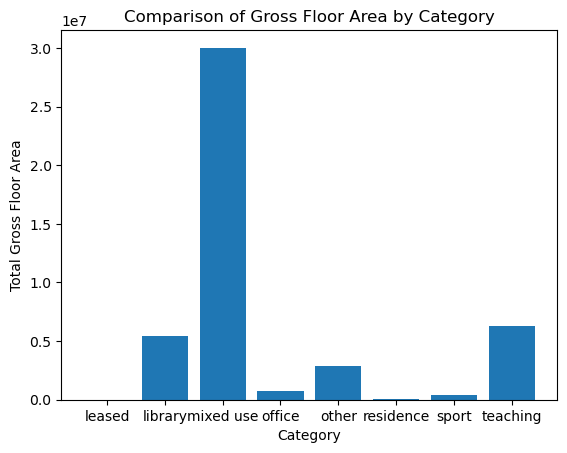

In [27]:
#Comparison of gross floor area by category
plt.bar(building_cat['category'], building_cat['gross_floor_area'].values)
plt.xlabel('Category')
plt.ylabel('Total Gross Floor Area')
plt.title('Comparison of Gross Floor Area by Category')
plt.show()

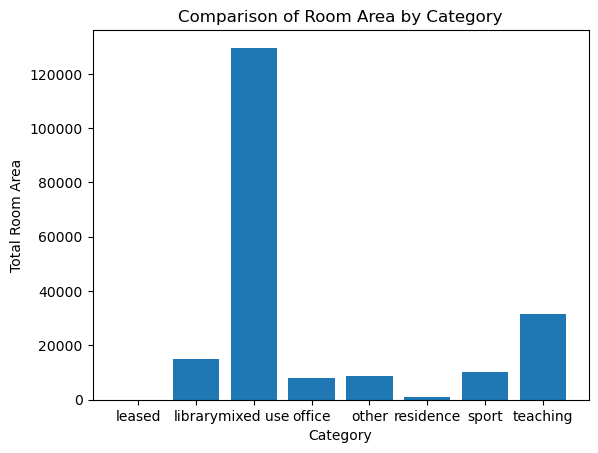

In [28]:
#Comparison of room area by category
plt.bar(building_cat['category'], building_cat['room_area'].values)
plt.xlabel('Category')
plt.ylabel('Total Room Area')
plt.title('Comparison of Room Area by Category')
plt.show()

# cat 1,2,6,7

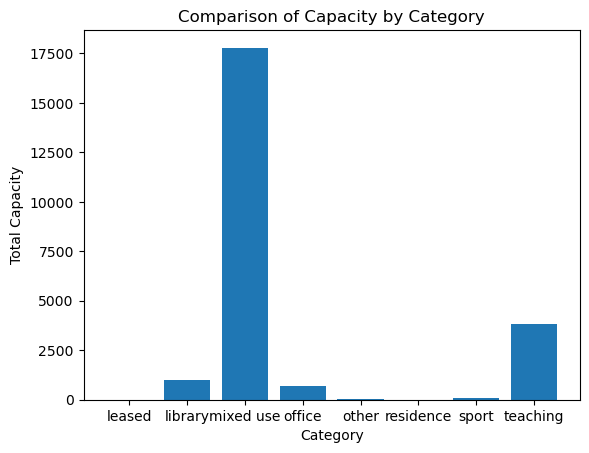

In [29]:
#Comparison of capacity by category
plt.bar(building_cat['category'], building_cat['capacity'].values)
plt.xlabel('Category')
plt.ylabel('Total Capacity')
plt.title('Comparison of Capacity by Category')
plt.show()

# cat 1,2,3,7

In [30]:
chosen_category = ['library', 'mixed use', 'teaching', 'office']

In [31]:
category_df = category_df[category_df['category'].isin(chosen_category)]

In [32]:
category_df

,campus_id,id,built_year,category,gross_floor_area,room_area,capacity
3,1,4,1967.0,mixed use,145558.14,1790.17,79.0
6,1,7,1980.0,teaching,176996.61,2377.77,799.0
15,1,16,1992.0,mixed use,786493.89,5681.03,737.0
16,1,17,1967.0,mixed use,1259005.45,5129.22,616.0
17,1,18,1972.0,mixed use,1405706.16,5353.08,775.0
22,1,23,1970.0,office,558322.60,4626.98,481.0
23,1,24,1967.0,mixed use,1558475.10,5485.43,552.0
24,1,25,1972.0,mixed use,384454.45,2997.53,442.0
25,1,26,1972.0,mixed use,1464449.61,6482.51,766.0
26,1,27,1967.0,mixed use,145226.20,2850.78,1246.0


In [33]:
category_df['id'].count()

35

In [34]:
libra_building = category_df[category_df['category'] == 'library']
libra_building

,campus_id,id,built_year,category,gross_floor_area,room_area,capacity
36,1,37,1965.0,library,5459748.9,15175.56,983.0


In [35]:
mixed_building = category_df[category_df['category'] == 'mixed use']
mixed_building

,campus_id,id,built_year,category,gross_floor_area,room_area,capacity
3,1,4,1967.0,mixed use,145558.14,1790.17,79.0
15,1,16,1992.0,mixed use,786493.89,5681.03,737.0
16,1,17,1967.0,mixed use,1259005.45,5129.22,616.0
17,1,18,1972.0,mixed use,1405706.16,5353.08,775.0
23,1,24,1967.0,mixed use,1558475.10,5485.43,552.0
24,1,25,1972.0,mixed use,384454.45,2997.53,442.0
25,1,26,1972.0,mixed use,1464449.61,6482.51,766.0
26,1,27,1967.0,mixed use,145226.20,2850.78,1246.0
28,1,29,1976.0,mixed use,1691664.84,5219.72,721.0
29,1,30,1988.0,mixed use,1466488.42,4961.59,994.0


In [36]:
office_building = category_df[category_df['category'] == 'office']
office_building

,campus_id,id,built_year,category,gross_floor_area,room_area,capacity
22,1,23,1970.0,office,558322.60,4626.98,481.0
41,1,42,1899.0,office,4249.98,370.55,8.0
48,1,49,1969.0,office,222608.96,2958.09,199.0


In [37]:
teaching_building = category_df[category_df['category'] == 'teaching']
teaching_building

,campus_id,id,built_year,category,gross_floor_area,room_area,capacity
6,1,7,1980.0,teaching,176996.61,2377.77,799.0
30,1,31,1899.0,teaching,125797.68,3733.95,264.0
31,1,32,1899.0,teaching,8037.12,827.70,488.0
38,1,39,1972.0,teaching,1356939.48,5880.35,723.0
40,1,41,2019.0,teaching,16967.00,NaN,NaN
56,1,57,2019.0,teaching,3291656.20,11077.74,204.0
61,1,62,1968.0,teaching,1274716.17,7615.16,1331.0


In [38]:
library_meters = list(libra_building['id'])

In [39]:
library_meters

[37]

In [40]:
library_consumption = building_df[building_df['meter_id'] == 37]

In [41]:
library_consumption

,campus_id,meter_id,timestamp,consumption,date
4494413,1,37,2018-01-01 00:15:00,65.0000,2018-01-01
4494414,1,37,2018-01-01 00:30:00,63.7500,2018-01-01
4494415,1,37,2018-01-01 00:45:00,65.0000,2018-01-01
4494416,1,37,2018-01-01 01:00:00,64.7500,2018-01-01
4494417,1,37,2018-01-01 01:15:00,65.5000,2018-01-01
...,...,...,...,...,...
4641313,1,37,2022-04-30 22:45:00,61.1875,2022-04-30
4641314,1,37,2022-04-30 23:00:00,62.7500,2022-04-30
4641315,1,37,2022-04-30 23:15:00,60.5000,2022-04-30
4641316,1,37,2022-04-30 23:30:00,61.0000,2022-04-30


In [42]:
teaching_meters = list(teaching_building['id'])

In [43]:
teaching_meters

[7, 31, 32, 39, 41, 57, 62]

In [44]:
teaching_consumption = building_df[building_df['meter_id'].isin(teaching_meters)]

In [45]:
teaching_consumption

,campus_id,meter_id,timestamp,consumption,date
524846,1,7,2018-01-13 16:15:00,5.56002,2018-01-13
524847,1,7,2018-01-13 16:30:00,5.30503,2018-01-13
524848,1,7,2018-01-13 16:45:00,5.07292,2018-01-13
524849,1,7,2018-01-13 17:00:00,4.97351,2018-01-13
524850,1,7,2018-01-13 17:15:00,4.75840,2018-01-13
...,...,...,...,...,...
7807019,1,62,2022-04-30 22:45:00,7.25000,2022-04-30
7807020,1,62,2022-04-30 23:00:00,7.75000,2022-04-30
7807021,1,62,2022-04-30 23:15:00,7.50000,2022-04-30
7807022,1,62,2022-04-30 23:30:00,7.50000,2022-04-30


In [46]:
office_meters = list(office_building['id'])

In [47]:
office_meters

[23, 42, 49]

In [48]:
office_consumption = building_df[building_df['meter_id'].isin(office_meters)]

In [49]:
office_consumption

,campus_id,meter_id,timestamp,consumption,date
2493085,1,23,2018-01-01 00:15:00,26.59888,2018-01-01
2493086,1,23,2018-01-01 00:30:00,27.36069,2018-01-01
2493087,1,23,2018-01-01 00:45:00,28.42600,2018-01-01
2493088,1,23,2018-01-01 01:00:00,28.12331,2018-01-01
2493089,1,23,2018-01-01 01:15:00,26.75231,2018-01-01
...,...,...,...,...,...
6127241,1,49,2022-04-30 22:45:00,13.22650,2022-04-30
6127242,1,49,2022-04-30 23:00:00,13.61850,2022-04-30
6127243,1,49,2022-04-30 23:15:00,12.86500,2022-04-30
6127244,1,49,2022-04-30 23:30:00,13.21600,2022-04-30


In [50]:
mixed_meters = list(mixed_building['id'])

In [51]:
mixed_meters

[4,
 16,
 17,
 18,
 24,
 25,
 26,
 27,
 29,
 30,
 33,
 34,
 36,
 38,
 44,
 50,
 51,
 54,
 55,
 58,
 59,
 60,
 61,
 63]

In [52]:
mixed_consumption = building_df[building_df['meter_id'].isin(mixed_meters)]

In [53]:
mixed_consumption

,campus_id,meter_id,timestamp,consumption,date
122254,1,4,2018-01-01 00:15:00,3.600,2018-01-01
122255,1,4,2018-01-01 00:30:00,3.846,2018-01-01
122256,1,4,2018-01-01 00:45:00,4.099,2018-01-01
122257,1,4,2018-01-01 01:00:00,3.951,2018-01-01
122258,1,4,2018-01-01 01:15:00,3.958,2018-01-01
...,...,...,...,...,...
7954053,1,63,2022-04-30 22:45:00,10.000,2022-04-30
7954054,1,63,2022-04-30 23:00:00,10.500,2022-04-30
7954055,1,63,2022-04-30 23:15:00,10.500,2022-04-30
7954056,1,63,2022-04-30 23:30:00,10.000,2022-04-30


# Category Consumption

In [54]:
lib_consumption_by_date = library_consumption.groupby(['date'])['consumption'].agg(avg_consumption=('mean'),
                                                                                   total_consumption=('sum')).reset_index()

In [55]:
lib_consumption_by_date

,date,avg_consumption,total_consumption
0,2018-01-01,63.992105,6079.2500
1,2018-01-02,69.997396,6719.7500
2,2018-01-03,68.811198,6605.8750
3,2018-01-04,66.688802,6402.1250
4,2018-01-05,67.885417,6517.0000
...,...,...,...
1571,2022-04-26,54.419079,5169.8125
1572,2022-04-27,56.443359,5418.5625
1573,2022-04-28,56.498047,5423.8125
1574,2022-04-29,56.792318,5452.0625


In [56]:
mixed_comsumption_by_date = mixed_consumption.groupby(['date'])['consumption'].agg(avg_consumption=('mean'),
                                                                                   total_consumption=('sum')).reset_index()

In [57]:
mixed_comsumption_by_date

,date,avg_consumption,total_consumption
0,2018-01-01,13.553464,29017.96719
1,2018-01-02,15.497212,33814.91715
2,2018-01-03,15.634061,34348.03172
3,2018-01-04,16.579264,36441.22155
4,2018-01-05,17.206918,37425.04581
...,...,...,...
1571,2022-04-26,13.690899,28682.43333
1572,2022-04-27,13.708544,28829.06720
1573,2022-04-28,13.864998,29185.82127
1574,2022-04-29,13.667408,28810.89665


In [58]:
off_comsumption_by_date = office_consumption.groupby(['date'])['consumption'].agg(avg_consumption=('mean'),
                                                                                   total_consumption=('sum')).reset_index()

In [59]:
off_comsumption_by_date

,date,avg_consumption,total_consumption
0,2018-01-01,13.530430,3829.11179
1,2018-01-02,13.947899,4003.04707
2,2018-01-03,13.684719,3927.51447
3,2018-01-04,13.704866,3919.59162
4,2018-01-05,13.478516,3881.81272
...,...,...,...
1571,2022-04-26,16.612790,4767.87087
1572,2022-04-27,16.832353,4847.71779
1573,2022-04-28,16.505123,4720.46527
1574,2022-04-29,16.698709,4809.22827


In [60]:
teaching_comsumption_by_date = teaching_consumption.groupby(['date'])['consumption'].agg(avg_consumption=('mean'),
                                                                                   total_consumption=('sum')).reset_index()

In [61]:
teaching_comsumption_by_date

,date,avg_consumption,total_consumption
0,2018-01-01,10.793349,3864.01877
1,2018-01-02,12.303592,4527.72174
2,2018-01-03,13.253081,5036.17061
3,2018-01-04,13.591577,5219.16539
4,2018-01-05,14.025496,5385.79049
...,...,...,...
1573,2022-04-26,12.875943,6167.57693
1574,2022-04-27,13.045261,6118.22760
1575,2022-04-28,13.397183,6283.27885
1576,2022-04-29,13.140889,6215.64048


# Skewness checks

In [62]:
from seaborn.external.kde import sqrt
import numpy as np
import seaborn as sns

In [63]:
lib_skw = lib_consumption_by_date['avg_consumption']

C:\Users\tangt\AppData\Local\Temp\ipykernel_15388\1329880684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lib_skw)


<Axes: xlabel='avg_consumption', ylabel='Density'>

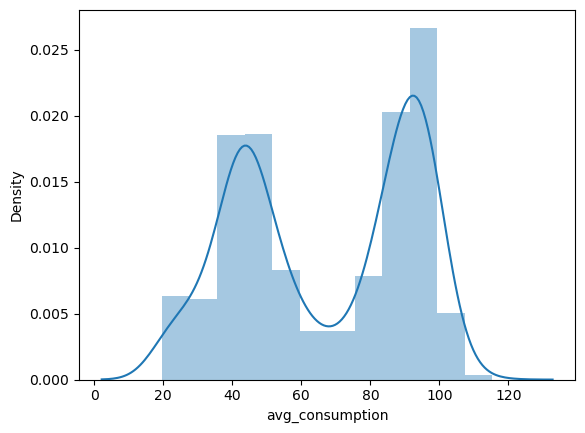

In [64]:
sns.distplot(lib_skw)

In [65]:
lib_skw.skew()

-0.1491359133251501

In [66]:
teach_skw = teaching_comsumption_by_date['avg_consumption']

C:\Users\tangt\AppData\Local\Temp\ipykernel_15388\2515289353.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(teach_skw)


<Axes: xlabel='avg_consumption', ylabel='Density'>

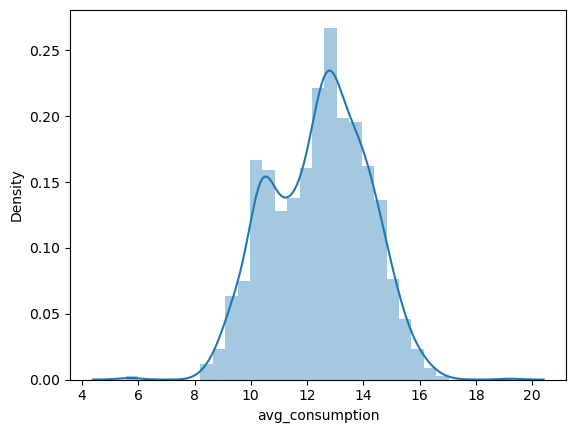

In [67]:
sns.distplot(teach_skw)

In [68]:
teach_skw.skew()

-0.1277485644409959

In [69]:
off_skw = off_comsumption_by_date['avg_consumption']

C:\Users\tangt\AppData\Local\Temp\ipykernel_15388\2397166828.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(off_skw)


<Axes: xlabel='avg_consumption', ylabel='Density'>

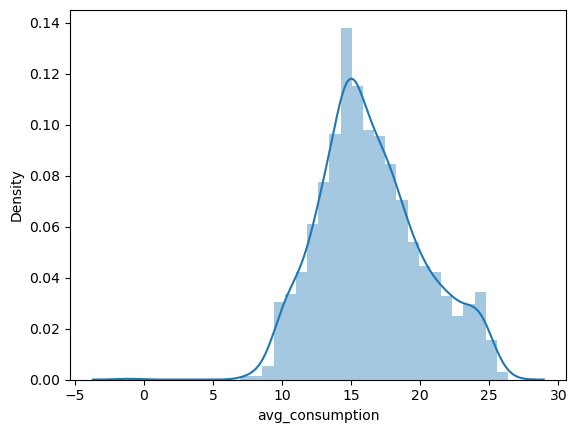

In [70]:
sns.distplot(off_skw)

In [71]:
off_skw.skew()

0.3246815847944612

In [72]:
mixed_skw = mixed_comsumption_by_date['avg_consumption']

C:\Users\tangt\AppData\Local\Temp\ipykernel_15388\2294107817.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mixed_skw)


<Axes: xlabel='avg_consumption', ylabel='Density'>

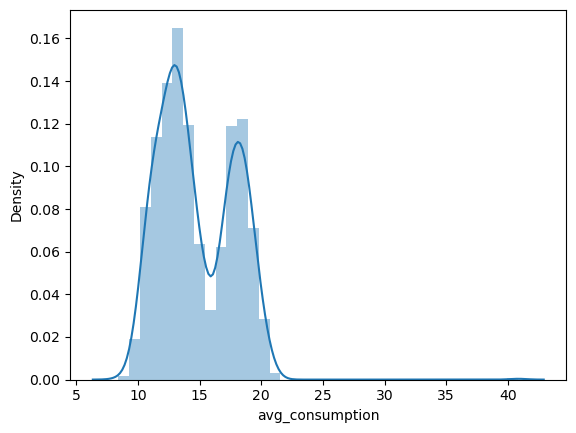

In [73]:
sns.distplot(mixed_skw)

In [74]:
mixed_skw.skew()

0.6311039162922873

# Conclusions

In [75]:
# building consumption data used for bullet no.1 [Trend - Energy consumption comparison (before and after Covid)]

consumption_by_date

,date,avg_consumption,total_consumption
0,2018-01-01,13.824643,54952.95596
1,2018-01-02,15.409389,63178.49562
2,2018-01-03,15.400264,63633.88952
3,2018-01-04,16.027913,66419.67300
4,2018-01-05,16.504048,68178.22221
...,...,...,...
1573,2022-04-26,14.157997,56844.35824
1574,2022-04-27,14.120092,57016.93115
1575,2022-04-28,14.226883,57348.56590
1576,2022-04-29,14.077274,56900.34208


In [76]:
# weather data used for bullet no.1

temp_by_date

,date,mean,max,min
0,2018-01-01,19.368125,27.3,14.7
1,2018-01-02,18.711736,23.7,16.1
2,2018-01-03,17.523264,23.4,13.5
3,2018-01-04,18.491944,26.7,10.7
4,2018-01-05,22.298056,32.6,13.1
...,...,...,...,...
1576,2022-04-26,15.318750,22.3,7.6
1577,2022-04-27,16.956250,20.8,13.1
1578,2022-04-28,18.002083,20.9,15.7
1579,2022-04-29,18.383333,20.9,14.7


In [77]:
# Identify building categories

building_cat

,category,gross_floor_area,room_area,capacity
0,leased,600.00,0.00,0.0
1,library,5459748.90,15175.56,983.0
2,mixed use,30020312.53,129603.34,17785.0
3,office,785181.54,7955.62,688.0
4,other,2877111.75,8631.69,46.0
5,residence,42646.40,871.42,0.0
6,sport,387354.08,10138.66,73.0
7,teaching,6251110.26,31512.67,3809.0


In [78]:
# 04 datasets of building consumptions by category

# library consumption

lib_consumption_by_date

,date,avg_consumption,total_consumption
0,2018-01-01,63.992105,6079.2500
1,2018-01-02,69.997396,6719.7500
2,2018-01-03,68.811198,6605.8750
3,2018-01-04,66.688802,6402.1250
4,2018-01-05,67.885417,6517.0000
...,...,...,...
1571,2022-04-26,54.419079,5169.8125
1572,2022-04-27,56.443359,5418.5625
1573,2022-04-28,56.498047,5423.8125
1574,2022-04-29,56.792318,5452.0625


In [79]:
# mixed use consumption

mixed_comsumption_by_date

,date,avg_consumption,total_consumption
0,2018-01-01,13.553464,29017.96719
1,2018-01-02,15.497212,33814.91715
2,2018-01-03,15.634061,34348.03172
3,2018-01-04,16.579264,36441.22155
4,2018-01-05,17.206918,37425.04581
...,...,...,...
1571,2022-04-26,13.690899,28682.43333
1572,2022-04-27,13.708544,28829.06720
1573,2022-04-28,13.864998,29185.82127
1574,2022-04-29,13.667408,28810.89665


In [80]:
# office consumption

off_comsumption_by_date

,date,avg_consumption,total_consumption
0,2018-01-01,13.530430,3829.11179
1,2018-01-02,13.947899,4003.04707
2,2018-01-03,13.684719,3927.51447
3,2018-01-04,13.704866,3919.59162
4,2018-01-05,13.478516,3881.81272
...,...,...,...
1571,2022-04-26,16.612790,4767.87087
1572,2022-04-27,16.832353,4847.71779
1573,2022-04-28,16.505123,4720.46527
1574,2022-04-29,16.698709,4809.22827


In [81]:
# teaching consumption

teaching_comsumption_by_date

,date,avg_consumption,total_consumption
0,2018-01-01,10.793349,3864.01877
1,2018-01-02,12.303592,4527.72174
2,2018-01-03,13.253081,5036.17061
3,2018-01-04,13.591577,5219.16539
4,2018-01-05,14.025496,5385.79049
...,...,...,...
1573,2022-04-26,12.875943,6167.57693
1574,2022-04-27,13.045261,6118.22760
1575,2022-04-28,13.397183,6283.27885
1576,2022-04-29,13.140889,6215.64048


# Exported datasets

In [82]:
consumption_by_date.to_csv('building_consumption_by_date.csv', index=False)

temp_by_date.to_csv('temerature_by_date.csv', index=False)

lib_consumption_by_date.to_csv('library_consumption_by_date.csv', index=False)

mixed_comsumption_by_date.to_csv('mixed_use_consumption_by_date.csv', index=False)

off_comsumption_by_date.to_csv('office_consumption_by_date.csv', index=False)

teaching_comsumption_by_date.to_csv('teaching_consumption_by_date.csv', index=False)

# Days exceed average consumption

In [ ]:
consumption_by_date

In [ ]:
avg_con = consumption_by_date['avg_consumption'].mean()

In [ ]:
avg_con

In [ ]:
exceeding_con = consumption_by_date[consumption_by_date['avg_consumption'] > avg_con]

In [ ]:
exceeding_con

In [ ]:
ex_avg = exceeding_con['avg_consumption'].mean()

In [ ]:
ex_avg

In [ ]:
st_date = '2019-02-26'
ed_date = '2019-03-02'

In [ ]:
orient = exceeding_con[(exceeding_con['date'] >= st_date) & (exceeding_con['date'] <= ed_date)]

In [ ]:
orient

# Calendar data

In [ ]:
cal_df = pd.read_csv('./calender.csv')

In [ ]:
cal_df

In [ ]:
start_date = '2018-01-01'

In [ ]:
end_date = '2022-04-30'

In [ ]:
calender_df = cal_df[(cal_df['date'] >= start_date) & (cal_df['date'] <= end_date)]

In [ ]:
calender_df

In [ ]:
calender_df.to_csv('calender_df.csv', index=False)

# Before and During COVID

In [87]:
consumption_by_date

,date,avg_consumption,total_consumption
0,2018-01-01,13.824643,54952.95596
1,2018-01-02,15.409389,63178.49562
2,2018-01-03,15.400264,63633.88952
3,2018-01-04,16.027913,66419.67300
4,2018-01-05,16.504048,68178.22221
...,...,...,...
1573,2022-04-26,14.157997,56844.35824
1574,2022-04-27,14.120092,57016.93115
1575,2022-04-28,14.226883,57348.56590
1576,2022-04-29,14.077274,56900.34208


In [92]:
before_covid = '2018-01-01'
start_covid = '2020-01-01'
end_covid = '2022-01-01'

In [88]:
before_cov = consumption_by_date[(consumption_by_date['date'] >= before_covid) & (consumption_by_date['date'] < start_covid)]

In [89]:
before_cov

,date,avg_consumption,total_consumption
0,2018-01-01,13.824643,54952.95596
1,2018-01-02,15.409389,63178.49562
2,2018-01-03,15.400264,63633.88952
3,2018-01-04,16.027913,66419.67300
4,2018-01-05,16.504048,68178.22221
...,...,...,...
725,2019-12-27,13.532979,61602.12086
726,2019-12-28,14.007468,63818.02270
727,2019-12-29,14.494159,65528.09398
728,2019-12-30,15.998816,70378.79054


In [90]:
avg_before_covid = before_cov['avg_consumption'].mean()

In [91]:
avg_before_covid

16.947311790015526

In [93]:
during_cov = consumption_by_date[(consumption_by_date['date'] >= start_covid) & (consumption_by_date['date'] < end_covid)]

In [94]:
during_cov

,date,avg_consumption,total_consumption
730,2020-01-01,13.695860,62138.11619
731,2020-01-02,14.538715,67677.71768
732,2020-01-03,15.085104,68999.26503
733,2020-01-04,12.987516,59482.82282
734,2020-01-05,12.591882,57280.46941
...,...,...,...
1455,2021-12-27,11.337541,44363.79720
1456,2021-12-28,11.405135,43521.99516
1457,2021-12-29,11.606232,44208.13669
1458,2021-12-30,12.411925,47351.49278


In [95]:
avg_during_covid = during_cov['avg_consumption'].meann()

In [96]:
avg_during_covid

12.649762231674375

In [ ]:
year_2019 = '2019-01-01'

In [ ]:
year_2021 = '2021-01-01'

In [ ]:
dat_2018 = consumption_by_date[(consumption_by_date['date'] >= before_covid) & (consumption_by_date['date'] < year_2019)]

In [ ]:
dat_2018

In [ ]:
date_2018 = '2018-02-26'
end_2018 = '2018-03-02'

In [ ]:
orient_2018 = dat_2018[(dat_2018['date'] >= date_2018) & (dat_2018['date'] < end_2018)]

In [ ]:
orient_2018

In [ ]:
dat_2019 = consumption_by_date[(consumption_by_date['date'] >= year_2019) & (consumption_by_date['date'] < start_covid)]

In [ ]:
dat_2019

In [ ]:
date_2019 = '2019-02-26'
end_2019 = '2019-03-02'

In [ ]:
orient_2019 = dat_2019[(dat_2019['date'] >= date_2019) & (dat_2019['date'] < end_2019)]

In [ ]:
orient_2019

In [ ]:
dat_2020 = consumption_by_date[(consumption_by_date['date'] >= start_covid) & (consumption_by_date['date'] < year_2021)]

In [ ]:
dat_2020

In [ ]:
date_2020 = '2020-02-26'
end_2020 = '2020-03-02'

In [ ]:
orient_2020 = dat_2020[(dat_2020['date'] >= date_2020) & (dat_2020['date'] < end_2020)]

In [ ]:
orient_2020

# LED

In [97]:
led_start = '2019-09-24'

In [98]:
led_end_1 = '2019-12-13'

In [99]:
led_start_2 = '2020-03-05'

In [100]:
led_end_2 = '2020-03-23'

In [101]:
led_start_3 = '2020-11-10'

In [102]:
led_end_3 = '2020-11-24'

In [103]:
led_start_4 = '2021-01-12'

In [104]:
led_before_covid = before_cov[(before_cov['date'] >= led_start) & (before_cov['date'] <= led_end_1)]
led_before_covid

,date,avg_consumption,total_consumption
631,2019-09-24,17.638535,81031.42851
632,2019-09-25,17.847361,82187.09942
633,2019-09-26,17.733215,81909.72115
634,2019-09-27,15.184521,70213.22614
635,2019-09-28,13.882404,64011.76395
...,...,...,...
707,2019-12-09,16.875161,74486.96240
708,2019-12-10,16.532167,77668.12167
709,2019-12-11,16.389971,76885.35383
710,2019-12-12,16.282791,76594.24653


In [105]:
avg_led_before_covid = led_before_covid['avg_consumption'].mean()
avg_led_before_covid

16.298880700804897

In [106]:
led_during_covid_2 = during_cov[(during_cov['date'] >= led_start_2) & (during_cov['date'] <= led_end_2)]
led_during_covid_2

,date,avg_consumption,total_consumption
794,2020-03-05,17.467191,81816.32355
795,2020-03-06,16.751841,77678.28593
796,2020-03-07,13.762900,63804.80671
797,2020-03-08,13.447341,61763.63543
798,2020-03-09,16.225146,75609.18003
799,2020-03-10,17.150601,78669.80906
800,2020-03-11,17.673670,80910.05912
801,2020-03-12,18.077975,83429.85484
802,2020-03-13,17.480532,81599.12126
803,2020-03-14,12.737586,59408.10097


In [107]:
avg_led_during_2 = led_during_covid_2['avg_consumption'].mean()

In [108]:
avg_led_during_2

15.672019565695516

In [109]:
led_during_covid_3 = during_cov[(during_cov['date'] >= led_start_3) & (during_cov['date'] <= led_end_3)]
led_during_covid_3

,date,avg_consumption,total_consumption
1044,2020-11-10,13.484539,60397.25091
1045,2020-11-11,13.578420,64144.45747
1046,2020-11-12,13.443669,61746.77219
1047,2020-11-13,12.240234,57247.57415
1048,2020-11-14,10.866586,50290.55968
1049,2020-11-15,10.753202,50561.55584
1050,2020-11-16,12.978139,58946.70524
1051,2020-11-17,12.189072,56788.88578
1052,2020-11-18,12.802812,58713.69766
1053,2020-11-19,13.654319,61963.29803


In [110]:
avg_led_during_3 = led_during_covid_3['avg_consumption'].mean()
avg_led_during_3

12.548768661296302

In [111]:
day_1 = '2019-09-24'
day_2 = '2021-01-12'

In [114]:
pre_led_con = consumption_by_date[(consumption_by_date['date'] >= before_covid) & (consumption_by_date['date'] < day_1)]
pre_led_con

,date,avg_consumption,total_consumption
0,2018-01-01,13.824643,54952.95596
1,2018-01-02,15.409389,63178.49562
2,2018-01-03,15.400264,63633.88952
3,2018-01-04,16.027913,66419.67300
4,2018-01-05,16.504048,68178.22221
...,...,...,...
626,2019-09-19,18.329648,84096.42467
627,2019-09-20,18.759300,86161.46711
628,2019-09-21,14.891702,68784.77158
629,2019-09-22,14.203292,65093.68867


In [115]:
avg_pre_led = pre_led_con['avg_consumption'].mean()
avg_pre_led

17.08123395303827

In [112]:
led_con = consumption_by_date[(consumption_by_date['date'] >= day_1) & (consumption_by_date['date'] <= day_2)]
led_con

,date,avg_consumption,total_consumption
631,2019-09-24,17.638535,81031.42851
632,2019-09-25,17.847361,82187.09942
633,2019-09-26,17.733215,81909.72115
634,2019-09-27,15.184521,70213.22614
635,2019-09-28,13.882404,64011.76395
...,...,...,...
1103,2021-01-08,12.261306,49229.14334
1104,2021-01-09,11.332730,49127.38240
1105,2021-01-10,11.489820,51370.98656
1106,2021-01-11,12.727475,58190.01798


In [113]:
avg_led_con = led_con['avg_consumption'].mean()
avg_led_con

13.205294016009768

In [116]:
avg_pre_led = pre_led_con['avg_consumption'].mean()
avg_pre_led

17.08123395303827

# Solar

In [11]:
avg_4_yr = consumption_by_date['avg_consumption'].mean()

In [12]:
avg_4_yr

14.690101746661457